In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


import time
import math
import random
import re
import os
import sys


from utils.util import find_files_with_extension
from utils.util import  get_dataframe_from_filepath,calculate_statistics, extract_unique_mbps_and_ms
from utils.util import remove_outliers_iqr, comma_format, create_directory_if_not_exists,print_rtt_stats,save_rtt_stats

In [43]:
# Load data
mainpth="./Data"

graph_directory = os.path.join(mainpth, "Graphs")
create_directory_if_not_exists(graph_directory)

stats_directory = os.path.join(mainpth, "Stats")
create_directory_if_not_exists(graph_directory)


folderpaths = [mainpth+'./client1_data',mainpth+'./client2_data']
filenames, filepaths, filedict = find_files_with_extension(folderpaths, '.log')


Directory already exists: ./Data\Graphs
Directory already exists: ./Data\Graphs


In [44]:
filedict

{'1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log': './Data./client2_data\\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log',
 '1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log': './Data./client2_data\\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log',
 '1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log': './Data./cli

In [45]:
# Call the function and print unique combinations
unique_combinations = extract_unique_mbps_and_ms(folderpaths)
print("Unique Mbps and ms Combinations:")
for mbps, ms in sorted(unique_combinations):
    print(f'{mbps} Mbps, {ms} ms')


Unique Mbps and ms Combinations:
10 Mbps, 1 ms


In [46]:
mbps , ms = list(unique_combinations)[0]
net_settings = f'{mbps}_Mbps_{ms}_ms'
print(net_settings)

10_Mbps_1_ms


In [47]:
df=get_dataframe_from_filepath(filepaths[0])
df['ForeignPort'].unique()

./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log


array(['57298', '57260', '57214', '5101', '57224', '5102', '57212'],
      dtype=object)

In [48]:
unique_scenarios_dict={}
for index in range(len(filenames)):
    scenario = "_".join(filenames[index].split('_')[:4])
    if "l4s" in scenario:
        scenario = "_".join(filenames[index].split('_')[:3])
    if scenario in unique_scenarios_dict:
        unique_scenarios_dict[scenario].append(filedict[filenames[index]])
    else:
        unique_scenarios_dict[scenario]=[filedict[filenames[index]]]


In [49]:
unique_scenarios_dict

{'1_1_fq_codel': ['./Data./client1_data\\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log'],
 '1_1_fq_pie': ['./Data./client1_data\\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log'],
 '1_1_l4s': ['./Data./client1_data\\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_fq_codel': ['./Data./client1_data\\2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_fq_pie': ['./Data./client1_data\\2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_l4s': ['./Data./client1_data\\2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_l4s_10Mbps_1ms_dctcp_src2.siftr.log']}

In [50]:
from utils.plotter import  plot_siftr_graph


Start New Scenario
1_1_fq_codel
./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log

Start New Scenario
1_1_fq_pie
./Data./client1_data\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log

Start New Scenario
1_1_l4s
./Data./client1_data\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log


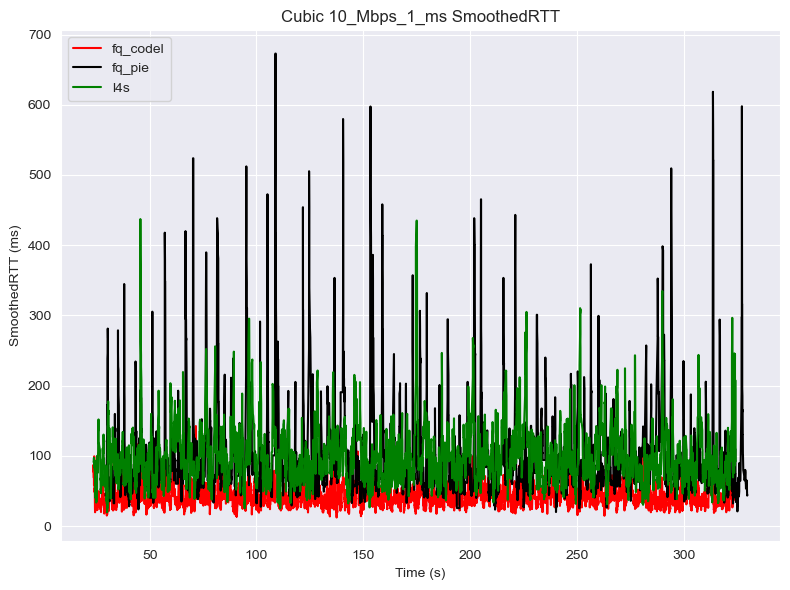

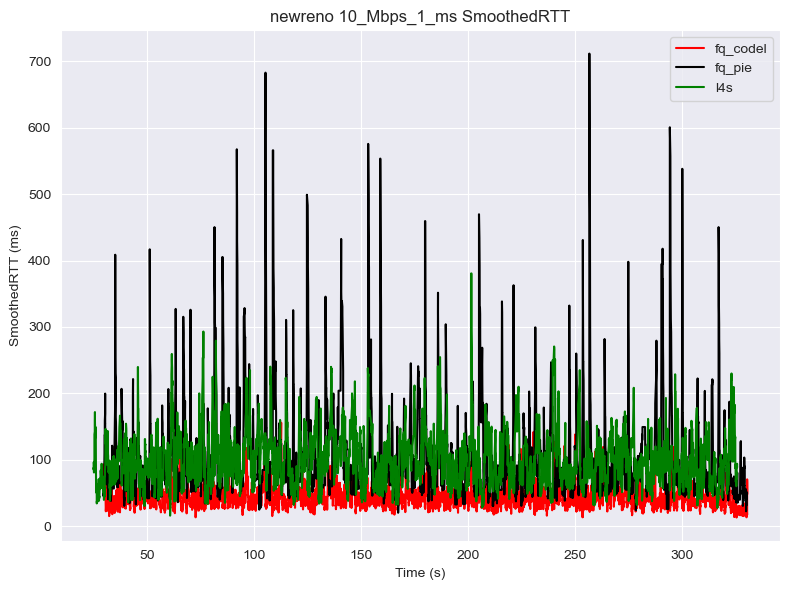

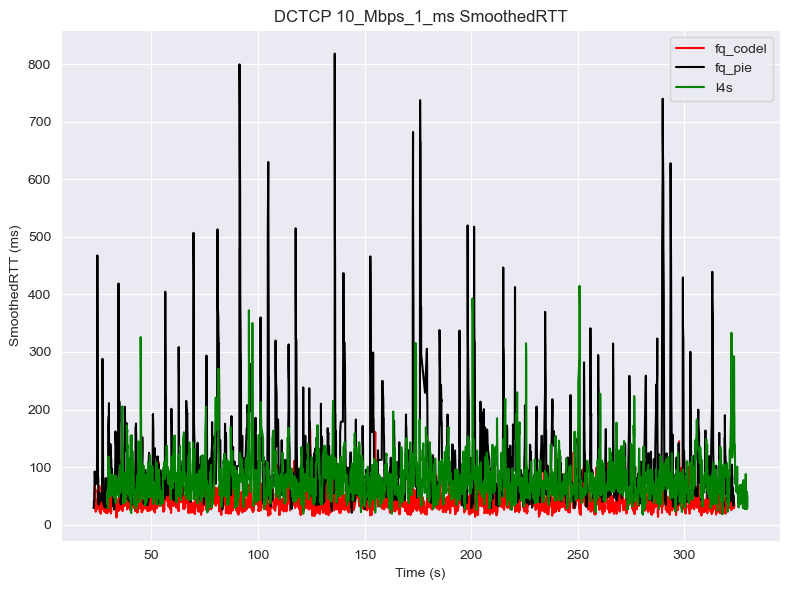

In [51]:
cubic_paths = {}
newreno_paths = {}
dctcp_paths = {}

aqms =["fq_codel","fq_pie","l4s"]

for scenario in list(unique_scenarios_dict.keys())[:3]:
    
    tcp1 = "CUBIC"
    tcp2 = "NEWRENO"
    tcp3 = "DCTCP"
    print()
    print("Start New Scenario")
    print(scenario)

    classif_traffic = unique_scenarios_dict[scenario][0]
    l4s_traffic = unique_scenarios_dict[scenario][1]

    ctf = get_dataframe_from_filepath(classif_traffic)
    ltf = get_dataframe_from_filepath(l4s_traffic)

    ctf1 = ctf[ctf['ForeignPort'] == "5101"]
    ctf2 = ctf[ctf['ForeignPort'] == "5102"]
    ltf =  ltf[ltf['ForeignPort'] == "5103"]

    # Define paths
    paths = {
        tcp1: ctf1,
        tcp2: ctf2,
        tcp3: ltf,
    }
    for aqm in aqms:
        if aqm in scenario:
            # print(aqm)
            cubic_paths[aqm] = ctf1
            newreno_paths[aqm] = ctf2
            dctcp_paths[aqm] = ltf


plot_siftr_graph(paths=cubic_paths,
                ycolumn="SmoothedRTT",
                title=f'Cubic {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'Cubic_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)

plot_siftr_graph(paths=newreno_paths,
                ycolumn="SmoothedRTT",
                title=f'newreno {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'newreno{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)


plot_siftr_graph(paths=dctcp_paths,
                ycolumn="SmoothedRTT",
                title=f'DCTCP {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'DCTCP_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)



Start New Scenario
1_1_fq_codel
./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log

Start New Scenario
1_1_fq_pie
./Data./client1_data\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log

Start New Scenario
1_1_l4s
./Data./client1_data\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log


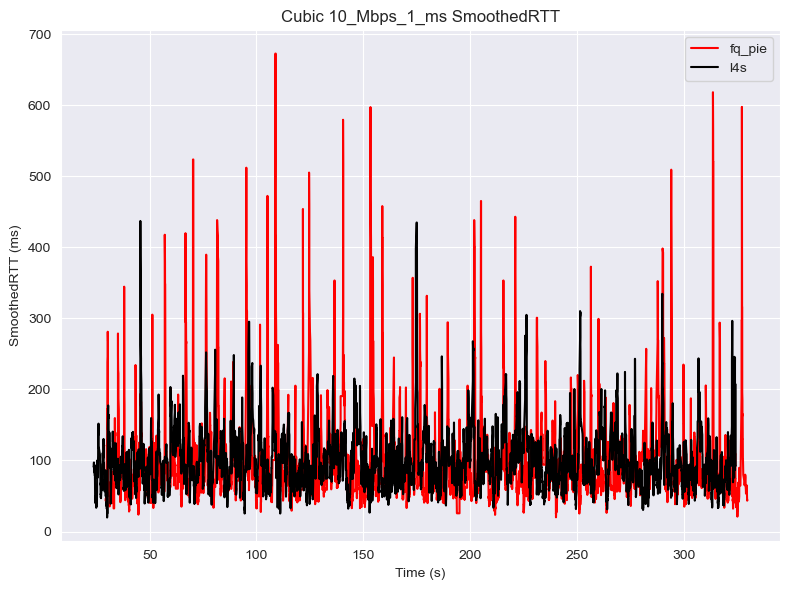

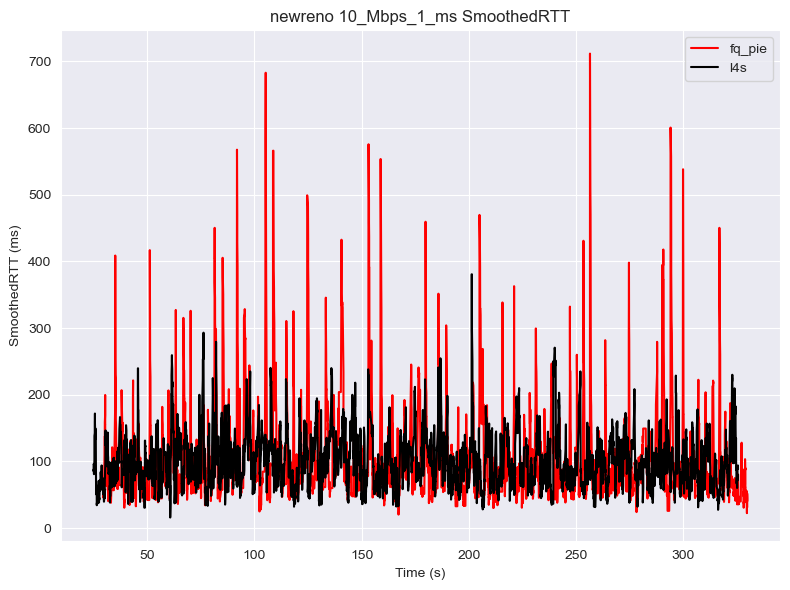

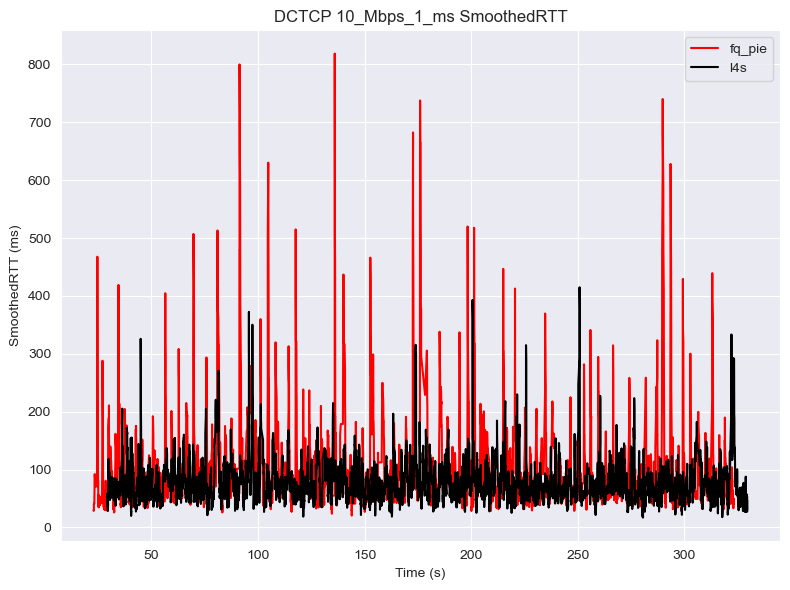

In [52]:
cubic_paths = {}
newreno_paths = {}
dctcp_paths = {}

aqms =["fq_codel","fq_pie","l4s"]
aqms =["fq_pie","l4s"]

for scenario in list(unique_scenarios_dict.keys())[:3]:
    
    tcp1 = "CUBIC"
    tcp2 = "NEWRENO"
    tcp3 = "DCTCP"
    print()
    print("Start New Scenario")
    print(scenario)

    classif_traffic = unique_scenarios_dict[scenario][0]
    l4s_traffic = unique_scenarios_dict[scenario][1]

    ctf = get_dataframe_from_filepath(classif_traffic)
    ltf = get_dataframe_from_filepath(l4s_traffic)

    ctf1 = ctf[ctf['ForeignPort'] == "5101"]
    ctf2 = ctf[ctf['ForeignPort'] == "5102"]
    ltf =  ltf[ltf['ForeignPort'] == "5103"]

    # Define paths
    paths = {
        tcp1: ctf1,
        tcp2: ctf2,
        tcp3: ltf,
    }
    for aqm in aqms:
        if aqm in scenario:
            # print(aqm)
            cubic_paths[aqm] = ctf1
            newreno_paths[aqm] = ctf2
            dctcp_paths[aqm] = ltf


plot_siftr_graph(paths=cubic_paths,
                ycolumn="SmoothedRTT",
                title=f'Cubic {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'Cubic_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)

plot_siftr_graph(paths=newreno_paths,
                ycolumn="SmoothedRTT",
                title=f'newreno {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'newreno{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)


plot_siftr_graph(paths=dctcp_paths,
                ycolumn="SmoothedRTT",
                title=f'DCTCP {net_settings} SmoothedRTT',
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'DCTCP_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)



Start New Scenario
1_1_fq_codel
./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 1_1_fq_codel_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 39.687
Mean: 41.963914518208185
25th Percentile: 31.875
75th Percentile: 49.062
Minimum: 12.187
Maximum: 142.5
Statistics for NEWRENO:
Median: 39.375
Mean: 41.91721628767848
25th Percentile: 31.562
75th Percentile: 48.75
Minimum: 13.125
Maximum: 160.0
Statistics for DCTCP:
Median: 36.562
Mean: 39.61897755117571
25th Percentile: 29.375
75th Percentile: 46.25
Minimum: 12.187
Maximum: 166.875
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_1_1_fq_codel_10_Mbps_1_ms_rtt_stats.txt


Start New Scenario
1_1_fq_pie
./Data./client1_data\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.

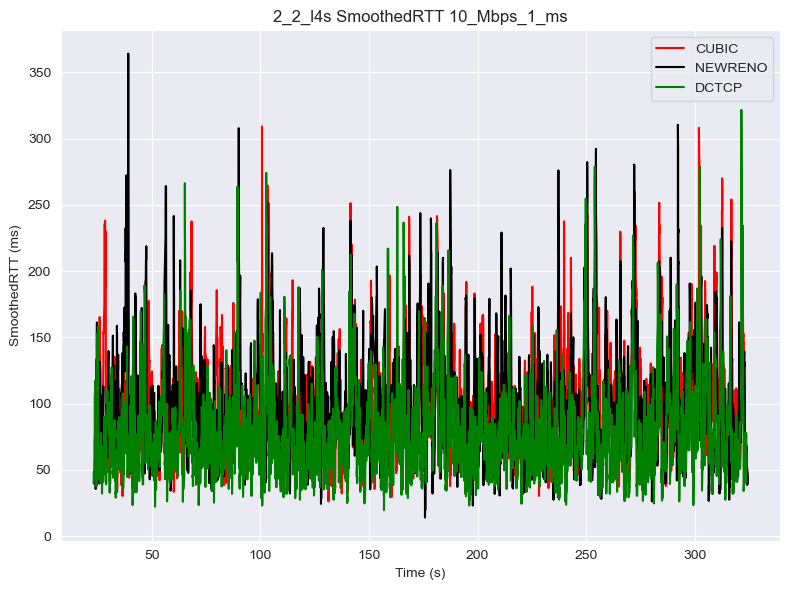

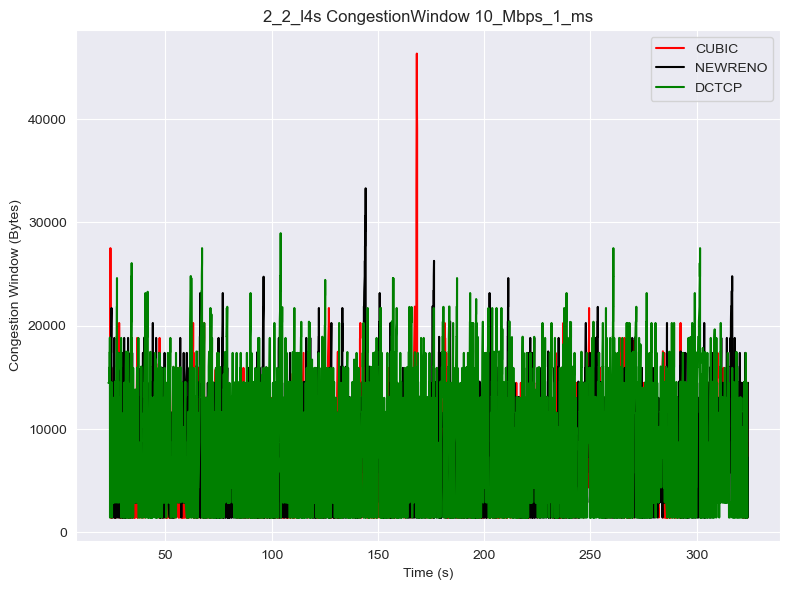

In [53]:
paths = {}
for scenario in unique_scenarios_dict.keys():

    tcp1 = "CUBIC"
    tcp2 = "NEWRENO"
    tcp3 = "DCTCP"
    print()
    print("Start New Scenario")
    print(scenario)

    classif_traffic = unique_scenarios_dict[scenario][0]
    l4s_traffic = unique_scenarios_dict[scenario][1]

    ctf = get_dataframe_from_filepath(classif_traffic)
    ltf = get_dataframe_from_filepath(l4s_traffic)

    ctf1 = ctf[ctf['ForeignPort'] == "5101"]
    ctf2 = ctf[ctf['ForeignPort'] == "5102"]
    ltf =  ltf[ltf['ForeignPort'] == "5103"]

    # Define paths
    paths = {
        tcp1: ctf1,
        tcp2: ctf2,
        tcp3: ltf,
    }

    print_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings)
    save_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings,stats_directory=stats_directory)




plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT {net_settings}",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)




plot_siftr_graph(paths=paths,
                ycolumn="CongestionWindow",
                title=f"{scenario} CongestionWindow {net_settings}",
                xlabel="Time (s)",
                ylabel="Congestion Window (Bytes)",
                filename=f'{scenario}_{net_settings}_CWND',
                graph_directory=graph_directory,
)
